This notebook is meant to test the implementation of the Storkey learning rule, and to compare its memory storing capacity to that of the Hebbian learning rule.

## Imports...

In [1]:
# enables plotting inline of Jupyter notebooks
%matplotlib inline

# autoreloading of modules
%load_ext autoreload
%autoreload 2

import numpy as np
import math

from network import HopfieldNetwork
from pattern_tools import PatternFactory
import pattern_tools
import plot_tools

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

## Fully Connected Hopfield Network(s) with Storkey Learning Rule

### Architecture Parameters

Set these to determine:

- The number of neurons in the network (and thus, the height / width of the corresponding 2D pattern).
- The probability that a given state in a randomly generated pattern is "on".
- The number of patterns to store in the network.
- The number of state flips to perform for noisy pattern recall (network initialization).
- The number of steps to allow the network dynamics to evolve.

In [50]:
# should be a square number for 2D patterns
nr_neurons = 100
pattern_length, pattern_width = int(math.sqrt(nr_neurons)), int(math.sqrt(nr_neurons))

# for random patterns, the probability that a single pixel is "on"
on_probability = 0.50
# number of patterns to store in the network (for fully connected, capacity is ~14%)
nr_patterns = 30

# number of flips to do noisy pattern network initialization (10% of the states here)
nr_of_flips = int(math.ceil(.10 * nr_neurons))
# number of steps to unroll the network dynamics
nr_steps = 7

## Creating Fully-Connected Hopfield Network; Generating and Storing Patterns (Storkey)

We create a Hopfield network with some $N$ neurons, generate some $n$ patterns to store in it, and store them using the Storkey learning rule.

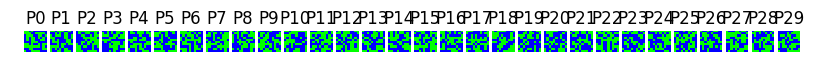

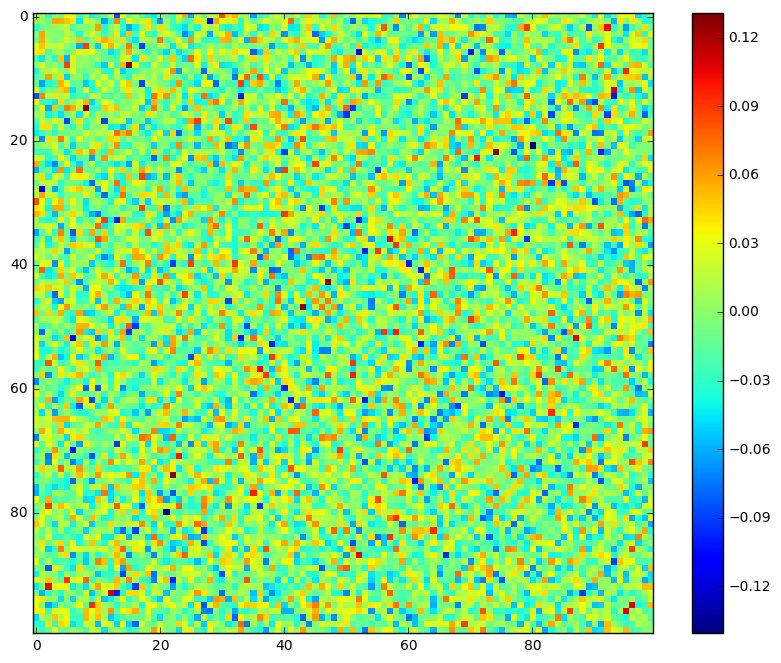

In [55]:
# create the Hopfield network
nn = HopfieldNetwork(nr_neurons=nr_neurons, connectivity='full')

# create a pattern factory for this network
factory = pattern_tools.PatternFactory(pattern_length=pattern_length, pattern_width=pattern_width)
# create random patterns to store in the network
patterns = factory.create_random_pattern_list(nr_patterns=nr_patterns, on_probability=on_probability)
# plot the patterns to inspect
plot_tools.plot_pattern_list(patterns)

# store the patterns in the fully connected Hopfield network with the Storkey learning rule
nn.store_patterns_storkey(patterns)
# plot the resulting network weights
plot_tools.plot_network_weights(hopfield_network=nn)

### Investigating Network Dynamics From Stored Pattern Intialization

Now, for each stored pattern, we initialize the network with it, let the network evolve for the chosen number of iterations, and record the overlap that results.

In [56]:
# investigate dynamics beginning from all patterns
for idx, pattern in enumerate(patterns):
    print '... evaluating dynamics starting from pattern', idx+1
    
    # set the initial state of the Hopfield network as the stored pattern
    nn.set_state_from_pattern(pattern)
    
    # let the dynamics evolve from this initial state
    states = nn.run_with_monitoring(nr_steps=nr_steps)
    
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    
    # compute overlap of each iteration with the initial configuration
    overlaps = pattern_tools.compute_overlap_list(pattern_list=states_as_patterns, reference_pattern=pattern)
    
    # print the overlap dynamics to the console
    for idx2, overlap in enumerate(overlaps):
        print 'overlap at time', idx2, ':', overlap

... evaluating dynamics starting from pattern 1
overlap at time 0 : 1.0
overlap at time 1 : 1.0
overlap at time 2 : 1.0
overlap at time 3 : 1.0
overlap at time 4 : 1.0
overlap at time 5 : 1.0
overlap at time 6 : 1.0
overlap at time 7 : 1.0
... evaluating dynamics starting from pattern 2
overlap at time 0 : 1.0
overlap at time 1 : 1.0
overlap at time 2 : 1.0
overlap at time 3 : 1.0
overlap at time 4 : 1.0
overlap at time 5 : 1.0
overlap at time 6 : 1.0
overlap at time 7 : 1.0
... evaluating dynamics starting from pattern 3
overlap at time 0 : 1.0
overlap at time 1 : 0.98
overlap at time 2 : 0.98
overlap at time 3 : 0.98
overlap at time 4 : 0.98
overlap at time 5 : 0.98
overlap at time 6 : 0.98
overlap at time 7 : 0.98
... evaluating dynamics starting from pattern 4
overlap at time 0 : 1.0
overlap at time 1 : 1.0
overlap at time 2 : 1.0
overlap at time 3 : 1.0
overlap at time 4 : 1.0
overlap at time 5 : 1.0
overlap at time 6 : 1.0
overlap at time 7 : 1.0
... evaluating dynamics starting 

### Investigating Network Dynamics From Noisy Stored Pattern Initialization

Now, for each stored pattern, we initialize the network with a noisy version of it (say, 10% of its states are randomly flipped), let the network evolve for the chosen number of iterations, and record the overlap that results.

In [57]:
# randomly flipping 10% of each of the stored patterns states
nr_of_flips = 10

# investigate dynamics beginning from all patterns
for idx, pattern in enumerate(patterns):
    print '... evaluating dynamics starting from pattern', idx+1
    
    # get noisy version of the stored pattern
    noisy_init = pattern_tools.flip_n(template=pattern, nr_of_flips=nr_of_flips)
    
    # set the initial state of the Hopfield network as the noisy copy
    nn.set_state_from_pattern(noisy_init)
    
    # let the dynamics evolve from this initial state
    states = nn.run_with_monitoring(nr_steps=nr_steps)
    
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    
    # compute overlap of each iteration with the initial configuration
    overlaps = pattern_tools.compute_overlap_list(pattern_list=states_as_patterns, reference_pattern=pattern)
    
    # print the overlap dynamics to the console
    for idx2, overlap in enumerate(overlaps):
        print 'overlap at time', idx2, ':', overlap

... evaluating dynamics starting from pattern 1
overlap at time 0 : 0.8
overlap at time 1 : 0.86
overlap at time 2 : 0.9
overlap at time 3 : 0.9
overlap at time 4 : 0.9
overlap at time 5 : 0.86
overlap at time 6 : 0.86
overlap at time 7 : 0.86
... evaluating dynamics starting from pattern 2
overlap at time 0 : 0.8
overlap at time 1 : 0.94
overlap at time 2 : 0.98
overlap at time 3 : 1.0
overlap at time 4 : 1.0
overlap at time 5 : 1.0
overlap at time 6 : 1.0
overlap at time 7 : 1.0
... evaluating dynamics starting from pattern 3
overlap at time 0 : 0.8
overlap at time 1 : 0.88
overlap at time 2 : 0.84
overlap at time 3 : 0.82
overlap at time 4 : 0.78
overlap at time 5 : 0.76
overlap at time 6 : 0.66
overlap at time 7 : 0.68
... evaluating dynamics starting from pattern 4
overlap at time 0 : 0.8
overlap at time 1 : 0.9
overlap at time 2 : 0.92
overlap at time 3 : 0.94
overlap at time 4 : 0.98
overlap at time 5 : 1.0
overlap at time 6 : 1.0
overlap at time 7 : 1.0
... evaluating dynamics 